## Central Limit Theorem

- A population that is not necessarily normally distributed
- Taking samples of sufficient size will result in normally distributed sample means


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import env
import os

np.random.seed(123)

In [3]:
# Define a roll [1, 2, 3, 4, 5, 6]

#set a sample of 10
n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

#100 rows and 10 columns
data = np.random.randint(1, 7, (nrows, ncols))

#view some outcomes
data[:4]

array([[6, 3, 5, 3, 2, 4, 3, 4, 2, 2],
       [1, 2, 2, 1, 1, 2, 4, 6, 5, 1],
       [1, 5, 2, 4, 3, 5, 3, 5, 1, 6],
       [1, 2, 4, 5, 5, 5, 2, 6, 4, 3]])

In [4]:
calculated_averages = data.mean(axis=1)
calculated_averages

array([3.4, 2.5, 3.5, 3.7, 3.2, 4.7, 3.4, 3.2, 3.4, 3. , 3.7, 3.5, 4. ,
       4.5, 2.9, 2.8, 2.9, 3.8, 3.2, 3.6, 3.4, 4. , 3.5, 3.3, 3.6, 3. ,
       4.3, 3. , 3.3, 3.2, 4.2, 3.9, 3.2, 3.8, 3.6, 3.4, 2.7, 3.4, 3.2,
       3.1, 3.2, 3. , 4.1, 3.3, 3. , 4.1, 3.4, 3.3, 2.9, 3.8, 3.4, 3.6,
       3.9, 3.2, 4.7, 3.8, 3.5, 2.8, 3.8, 4.7, 4.1, 3.5, 2.8, 3.7, 3.4,
       3.7, 3.6, 4.1, 3.6, 3.5, 2.9, 4. , 3.2, 3.4, 4.4, 2.9, 3.2, 3.9,
       1.9, 3. , 3. , 3.5, 3.3, 4.4, 3.4, 4.2, 4.1, 3.2, 3.5, 3.5, 3.8,
       3.1, 3.6, 2.9, 2.9, 4. , 3.3, 3.1, 3.4, 3.6])

Text(0.5, 1.0, 'Outcoming Averaging 10 dice rolls 100 times')

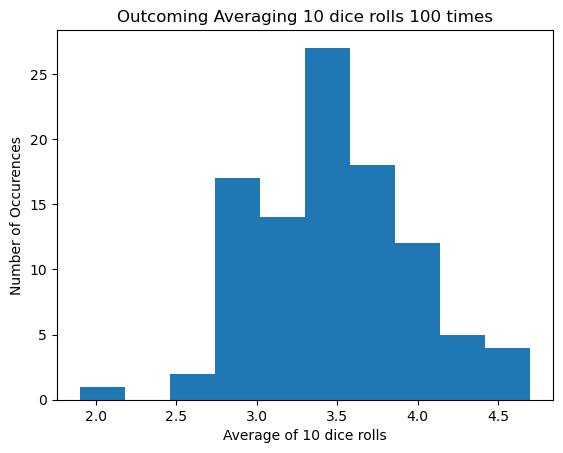

In [8]:
plt.hist(calculated_averages)

plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('Number of Occurences')
plt.title(f'Outcoming Averaging {n_dice_per_experiment} dice rolls {n_experiments} times')

### One Sample T-test

Comparing an observed mean to a theoretical one
- Plot distributions
- Establish the hypothesis 


In [17]:
def get_db_url(db, env_file=os.path.exists('env.py')):
    
    if env_file:    
        username, password, host = (env.username, env.password, env.host)   
        return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    else: 
        return "Hellooooo, you need a username and password, genius."

url = get_db_url('telco_churn')
query = 'SELECT * FROM customers'
telco_churn = pd.read_sql(query, url)

In [18]:
telco_churn.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


<AxesSubplot:>

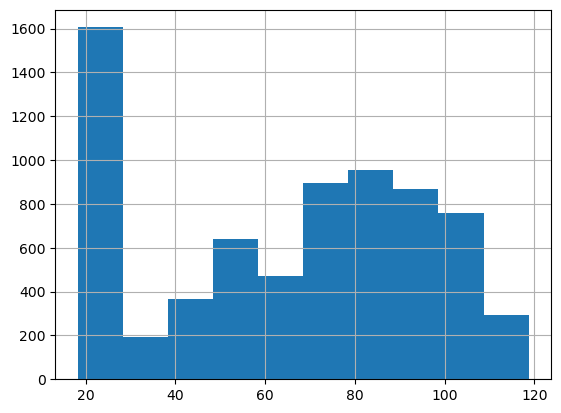

In [20]:
telco_churn.monthly_charges.hist()

<AxesSubplot:>

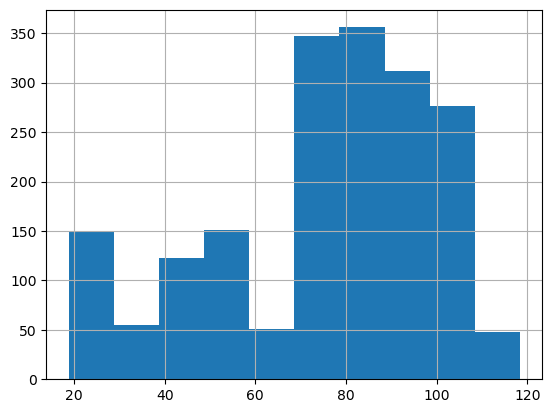

In [23]:
#filter for a sample to churn
churn_sample = telco_churn[telco_churn.churn == 'Yes'].monthly_charges

#create a histogram
churn_sample.hist()

### Set hypothesis 

H_0: mean of monthly charges of churned customers <= mean of monthly charges of all customers  
H_a: mean of monthly charges of churned customers is > mean of monthly charges of all customers

### Set an alpha value

In [31]:
alpha = .05

### Verify an assumption of sample size

In [25]:
telco_churn.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

### Compute Test Statistic



In [51]:
#churned customer sample
churn_sample = telco_churn[telco_churn.churn == 'Yes'].monthly_charges

#overall mean
overall_mean = telco_churn.monthly_charges.mean()

#output of a 1 tail, 1 sample t test
#specified the sample (churn_sample)
#specified the overall_mean

#stats.ttest_1samp(churn_sample, overall_mean)
#assign the output to t (for t statistis) and p (p value)
t, p = stats.ttest_1samp(churn_sample, overall_mean)

#1 tail, since we are specifically looking at a mean that is GREATER than the overall customer mean
print(t, p/2, alpha)

16.96540308050567 1.8703196496911995e-60 0.05


In [52]:
#look at t statistic
#is t > 0

#look at p/2 
#is p/2 < alpha

In [53]:
### The results based on the t statistic and p value

if p/2 > alpha:
    print('We fail the reject $H_{0}$')
elif t < 0:
    print('We fail the reject $H_{0}$')
else:
    print('We reject $H_{0}$')

We reject $H_{0}$


$H_{0}$

### Two Sample T test

#### Example

Monthly charges of churned customers are significantly different accross all customers
1 sample test, 2 tailed (because we are looking in both directions (greater than OR less than), not just one)

$H_{0}$ - mean of churned customers == mean of overall customers  
Ha - mean of churned customers != mean of overall customers

#### Example 2

Monthly charages of churned customers are significantly different than overall customers

Null: the mean of charges for churned = mean of charges for overall customers  
Alternative: the mean of charges for churned != mean of charges for overall customers


In [37]:
#Setup the test
#Compute t-statistic and p-value

t, p = stats.ttest_1samp(churn_sample, overall_mean)

t, p, alpha

(16.96540308050567, 3.740639299382399e-60, 0.05)

In [39]:
#compare the calculated p-value to alpha

p < alpha

if p < alpha:
    print('We reject the $H_{0}$')
else :
    print('We fail to reject $H_{0}$')

We reject the $H_{0}$


#example 

The monthly charge for customers who churn is less than the mean of all customers

- H_0: Monthly charges for customers who churn >= monthly charge for all customers
- H_a: Monthly charges for customers who churn < monthly charge for all customers

In [48]:
#is this one tailed or two tailed?
#is it 1 sample: Yes
#1 - tail: comparision is strictly less than

t, p = stats.ttest_1samp(churn_sample, overall_mean)

t, p/2, alpha

(16.96540308050567, 1.8703196496911995e-60, 0.05)

In [50]:
#is p/2 < alpha

print(p/2 < alpha)

#is t < 0

print(t < 0)

#to reject the null hypothesis: p/2 < alpha AND t < 0

True
False


#### Independent t-test (aka Two Sample t-test)

Goal: Compare the mean of some group (A) to that of another group (B)

Group A - Customers who churned  
Group B - Customers who did not churn

Verify assumptions:

- Check that we have at least 30 obervations
- Check independence
- Equal variance
        True - equal      False - not equal



In [ ]:
#set the alpha

alpha = .05

<AxesSubplot:>

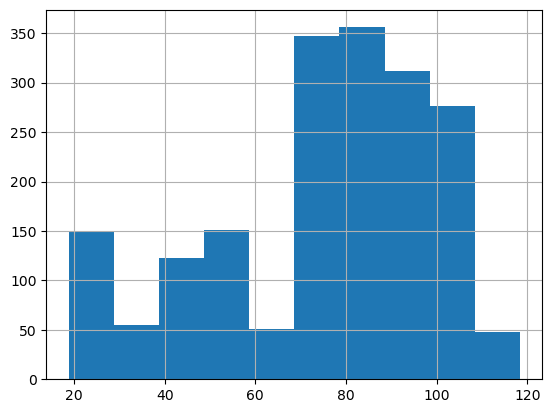

In [44]:
churned = telco_churn[telco_churn.churn == 'Yes'].monthly_charges

churned.hist()

Group B - Customers who haven't churned

<AxesSubplot:>

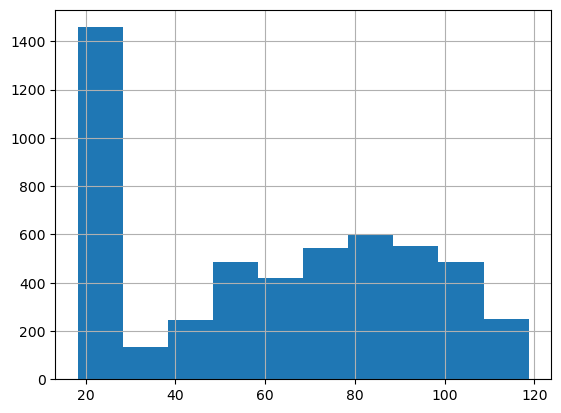

In [45]:
not_churned = telco_churn[telco_churn.churn == 'No'].monthly_charges

not_churned.hist()

In [59]:
alpha = .05

#find the variance of churn customers
print(churned.var())

#find the variance of non churn customers
print(not_churned.var())

#we will use the equal_var = False


608.4141833954315
966.7527670734293


In [62]:
t, p = stats.ttest_ind(churned, not_churned, equal_var=False)

#1 tail
#comparing alpha and p/2

t, p/2, alpha

(18.407526676414673, 4.296224665773525e-73, 0.05)

In [67]:
#evaluate results

p/2 < alpha

#compare t-statistic 

t > 0 

#p/2 is less than alpha
#t is greater than 0

#conclusion 

if p/2 > alpha:
    print('We fail to reject the null hypothesis.')
elif t < 0:
    print('We fail to reject the null hypothesis.')
else:
    print('We reject the null hypothesis.')

We reject the null hypothesis.


### Customers who churn are charged more than customers who do not churn


#### Set a hypothesis

H_0: Group who churn     <=     Group who do not churn  
H_a: Monthly charges of group who churn      >     Monthly charges of group who do not churn



#### example 2

Are monthly charges for customers who churn significantly different than the monthly charges of those who don't churn?

#### Hypothesis statement

H_0: Monthly charges are equal  
H_a: Monthly charges for churned and not churned are not equal

#### Two-tailed

- Compare p to alpha



In [70]:
t, p = stats.ttest_ind(churned, not_churned, equal_var=False)

t, p

(18.407526676414673, 8.59244933154705e-73)

In [71]:
#if p is less than alpha, we reject the null

p < alpha


True

#### Example 3

Are charges for churned customers significantly less than charges for not churn customers?

H_0: mean for churned customers is GREATER THAN or EQUAL TO the mean for non  churned customers
H_a: mean for churned customers is LESS THAN the mean for non churned customers

1 Tail
- less than comparision
- compare the alpha to p/2


In [78]:
t, p = stats.ttest_ind(churned, not_churned, equal_var=False)

t, p/2, alpha

#two conditions to meet
    #p/2 < alpha
    #t < 0

(18.407526676414673, 4.296224665773525e-73, 0.05)

In [75]:
#is t-statistis < 0
print('Is t<0?', t<0)

#is p/2 < alpha
print('Is p/2 < alpha?', p/2<alpha)

Is t<0? False
Is p/2 < alpha? True


### ANOVA - Analysis of Variance

##### Outcome: Compare means of groys A, B, C

- Plot distributions
- Establish hypothesis

##### Format of Hypothesis

$H_0$ Null Hypothesis - $\mu_{A} = \mu{B} = \mu{C}$  
$H_a$ Alternative Hypothesis - $\mu_{A} \neq \mu{B} \neq \mu{C}$

Significance Level

- alpha = .05

##### Verify Assumptions

- Normal Distribution or at least 30 observations
- Independent Samples
- Equal Variances

##### Syntax for test

```python
scipy.stats.f_oneway
```
Return: test statistics and a p-value

In [80]:
#loading a dataset that gives thre different groups
df = sns.load_dataset('iris')

#check the sample size
df.species.value_counts()

#df.info()

#independent - three different species
#sample size - sufficient

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [81]:
#Group A - setosa
#Group B - versicolo
#Group C - virginica

In [83]:
#statistical summary of sepal_length

df.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

<AxesSubplot:>

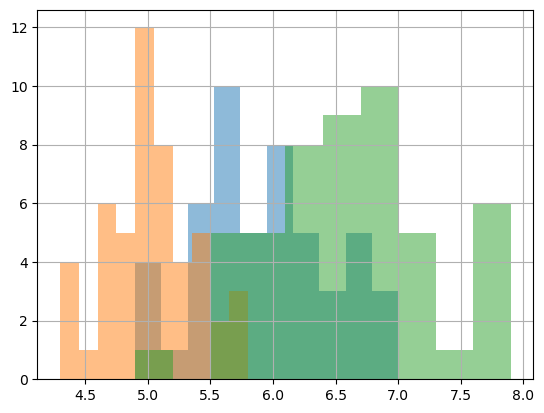

In [90]:
#filter sepal length by species
versicolor_sepal_length = df[df.species == 'versicolor'].sepal_length
virginica_sepal_length = df[df.species == 'virginica'].sepal_length
setosa_sepal_length = df[df.species == 'setosa'].sepal_length

versicolor_sepal_length.hist(alpha=.5)
setosa_sepal_length.hist(alpha=.5)
virginica_sepal_length.hist(alpha=.5)

<AxesSubplot:>

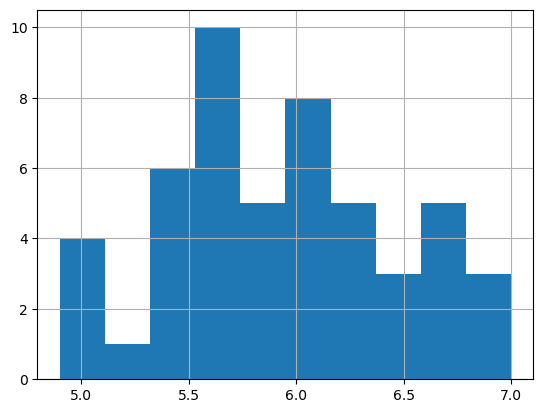

In [92]:
versicolor_sepal_length.hist()

<AxesSubplot:>

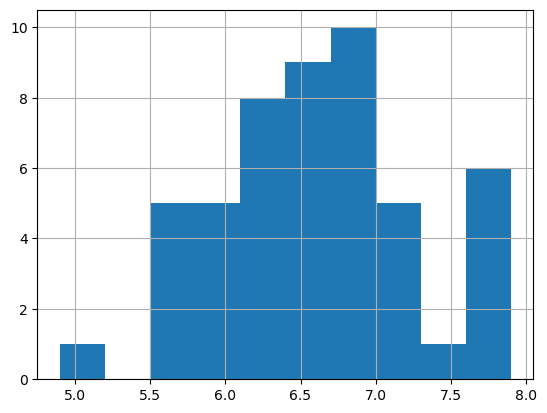

In [86]:
virginica_sepal_length.hist()

<AxesSubplot:>

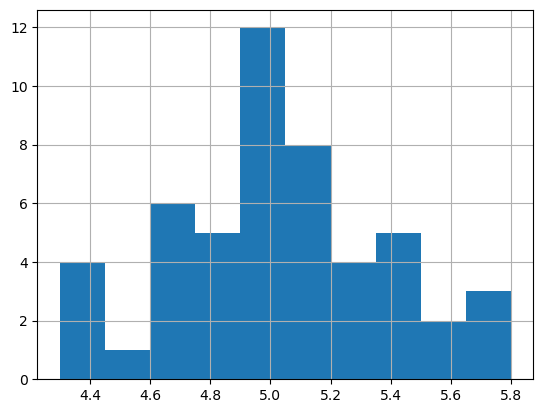

In [89]:
setosa_sepal_length.hist()

#####  State Hypothesis

$H_0$: For mean of sepal_length - Versicolor = Virginica = Setosa  
$H_a$: For mean of sepal_length - not all equal


In [93]:
#significance lvl:

alpha = .05

#Independence? Yes, they are different samples from within our population
#There are more than 30 observations for each group 
#Equal Variance? 

Test for equal variance : Levene's Test

$H_0$: population variances of sepal length across all three species are equal   
$H_a$: population variances of sepal length is different among at least two of the species

In [94]:
stats.levene(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)

LeveneResult(statistic=6.352720020482689, pvalue=0.0022585277836218586)

The p-value < .05, therefore the variances of at least two of the groups are significantly different.
In this case, it would not be recommended to run an ANOVA test because assumptions are violated. 
However, we will do it here to see what happens 
In practice, we would resort to a non parametric version of our test, 
which for an ANOVA test is a Kruskal-Wallis Test.


In [95]:
stats.f_oneway(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)

F_onewayResult(statistic=119.26450218450472, pvalue=1.6696691907693648e-31)

In [96]:
stats.kruskal(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)

KruskalResult(statistic=96.93743600064833, pvalue=8.91873433246198e-22)

Because variances were not equal, we would go with the result from the Kruskal-Wallis test. We 
still achieved significance.  
Our takeaway here is that there appears to be a significant difference in sepal length across at least two of the groups.

In [98]:
versicolor_sepal_length.mean()

5.936

In [99]:
virginica_sepal_length.mean()

6.587999999999998

In [100]:
setosa_sepal_length.mean()

5.005999999999999

In [105]:
stats.ttest_ind(versicolor_sepal_length, virginica_sepal_length, equal_var=False)

Ttest_indResult(statistic=-5.629165259719801, pvalue=1.8661443873771226e-07)

In [106]:
stats.ttest_ind(setosa_sepal_length, versicolor_sepal_length, equal_var=False)

Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17)

In [107]:
stats.ttest_ind(setosa_sepal_length, virginica_sepal_length, equal_var=False)

Ttest_indResult(statistic=-15.386195820079404, pvalue=3.9668672709859296e-25)

In comparing each group combination, we can see there is a significant difference in the sepal length of each species.

In [109]:
mpg = sns.load_dataset('mpg')

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [112]:
mpg.isna().sum()
#drop the nulls in horsepower
mpg = mpg[~mpg.horsepower.isna()]
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [114]:
mpg.origin.value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

Is the horsepower of vehicles different across the distinct origins of the vehicles?

$H_{0}$: mean_horsespower_usa == mean_horsepower_japan == mean_horsepower_europe.
$H_{a}$: mean horsepowers from at least countries are significantly different.

Assumptions
- At least 30 observations for each category : met (see value accounts above).
- Equal population variance across all three groups.
- Groups are independent of each other.



<AxesSubplot:>

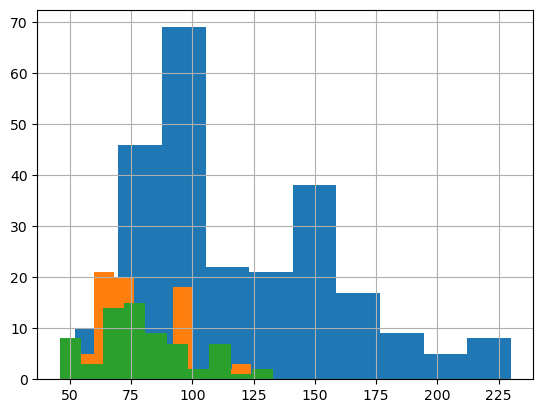

In [118]:
#lets look at the values of each of these and the histograms

mpg[mpg.origin == 'usa'].horsepower.hist()
mpg[mpg.origin == 'japan'].horsepower.hist()
mpg[mpg.origin == 'europe'].horsepower.hist()

In [119]:
#creating a series of horsepower for each country
usa = mpg[mpg.origin == 'usa'].horsepower
japan = mpg[mpg.origin == 'japan'].horsepower
europe = mpg[mpg.origin == 'europe'].horsepower

In [120]:
#validate the variance assumption

stats.levene(usa, japan, europe)

LeveneResult(statistic=26.526632103545772, pvalue=1.5863075873913356e-11)

With a low p-value, we can assume the variances of countries horsepower is significantly different across at least two of the countries  
With this, we know we should not use the ANOVA test and should instead use the Kruskal-Wallis test

In [122]:
test_statistic, p_value = stats.kruskal(usa, japan, europe)

In [123]:
p_value

1.1759521262123952e-23

With a p-value < 0.05 (our alpha), we can say there exists significant difference between the horsepower of vehicles in at least two of the countries. But which two?

Compare two groups: usa and japan

$H_0$: hp_usa == hp_japan  
$H_a$: hp_usa != hp_japan

In [126]:
#compare two groups to see if there is significance
t, p = stats.ttest_ind(usa, japan, equal_var=False)

if p < .05:
    print('There is a significant difference between the horsepower of vehicles from the USA vs Japan')
else:
    print('We failed to find a significant difference')

There is a significant difference between the horsepower of vehicles from the USA vs Japan


In [130]:
#compare two groups to see if there is significance
t, p = stats.ttest_ind(usa, europe, equal_var=False)

if p < .05:
    print(f'There is a significant difference between the horsepower of vehicles from the USA vs Europe. (p-value= {p})')
else:
    print(f'We failed to find a significant difference (p-value: {p})')

There is a significant difference between the horsepower of vehicles from the USA vs Europe. (p-value= 2.1065705369888018e-22)


In [131]:
#compare two groups to see if there is significance
t, p = stats.ttest_ind(europe, japan, equal_var=False)

if p < .05:
    print(f'There is a significant difference between the horsepower of vehicles from Europe and Japan. (p-value= {p})')
else:
    print(f'We failed to find a significant difference (p-value: {p})')

We failed to find a significant difference (p-value: 0.8193616065509621)
